Logistic Regression and Support Vector Machine
===

In [1]:
from sklearn import model_selection
from sklearn import datasets
from matplotlib import pyplot as plt
import numpy as np

In [2]:
train_data = datasets.load_svmlight_file('./data/a9a', n_features=123)
validate_data = datasets.load_svmlight_file('./data/a9a.t', n_features=123)
X_train = train_data[0].toarray()
y_train = train_data[1]
X_validate = validate_data[0].toarray()
y_validate = validate_data[1]
X_train = np.insert(X_train, 0, values=np.ones(X_train.shape[0]), axis=1)
X_validate = np.insert(X_validate, 0, values=np.ones(X_validate.shape[0]), axis=1)

In [3]:
y_train[y_train == -1] = 0
y_validate[y_validate == -1] = 0

In [4]:
w = np.random.normal(np.zeros(124))

In [5]:
def sigmoid(inX):  
    return 1.0/(1+np.exp(-inX))  

In [6]:
sigmoid(X_train.dot(w))

array([0.09621679, 0.79034507, 0.06011984, ..., 0.69791197, 0.60922908,
       0.30773257])

## 1.1 Get loss function
$J(w)=-\frac{1}{n}\sum\limits^n_{i=1}\left(y_i\log(h_w(x_i))+(1-y_i)\log(1-h_w(x_i))\right)$

In [7]:
def h(w, X):
    return sigmoid(X.dot(w))

In [8]:
def J(y_predict, y_validate):
    res = 0
    n = len(y_predict)
    for i in range(n):
        res += y_validate[i] * np.log(y_predict[i]) + (1 - y_validate[i]) * np.log(1 - y_predict[i])
    res /= n
    return -res

In [9]:
y = h(w, X_train)

In [10]:
J(y, y_train)

1.7552352700681944

In [11]:
def MSGD(X, y, w, alpha, batch_size, iters):
    n = len(y)
    loss_train = []
    loss_validate = []
    acc = []
    
    for k in range(iters):
        batch = []
        for i in range(batch_size):
            batch.append(int(np.random.randint(n)))

        X_batch = X[batch]
        y_batch = y[batch]
        tmp_w = w.copy()
        for i in range(batch_size):
            tmp_w += (h(w, X_batch[i]) - y_batch[i]) * (X_batch[i]) / batch_size
        w = w - alpha * tmp_w
        y_pre_t = h(w, X_train)
        y_pre_v = h(w, X_validate)
        loss_train.append(J(y_pre_t, y_train))
        loss_validate.append(J(y_pre_v, y_validate))
        y_pre_v[y_pre_v >= 0.5] = 1
        y_pre_v[y_pre_v < 0.5] = 0
        acc.append(1 - np.logical_xor(y_pre_v, y_validate).sum() / y_validate.shape[0])
        if k % 50 == 0:
            print('iters:', k, 'acc:', acc[k])
    return w, loss_train, loss_validate, acc

In [12]:
w, loss_train, loss_validate, acc = MSGD(X_train, y_train, w, 1e-2, 16, 500)

iters: 0 acc: 0.3426693692033659
iters: 50 acc: 0.49775812296541977
iters: 100 acc: 0.632270745040231
iters: 150 acc: 0.7267981082243106
iters: 200 acc: 0.7592899699035686
iters: 250 acc: 0.7638351452613475
iters: 300 acc: 0.7637737239727289
iters: 350 acc: 0.7637737239727289
iters: 400 acc: 0.7637737239727289
iters: 450 acc: 0.7637737239727289


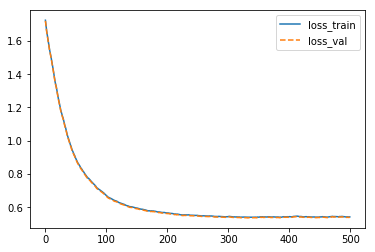

In [13]:
plt.plot(loss_train, label = 'loss_train')
plt.plot(loss_validate, label = 'loss_val', ls = '--')
plt.legend(loc='upper right')
plt.savefig('./tex/lab2/MSGD_lr.pdf')

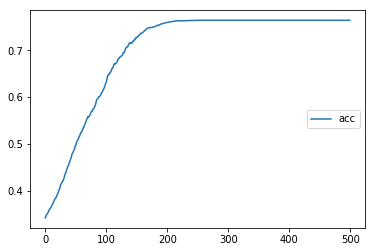

In [15]:
plt.plot(acc, label = 'acc')
plt.legend(loc='center right')
plt.savefig('./tex/lab2/acc_lr.pdf')